In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
from datetime import datetime, timedelta

In [152]:
import alphalens as al

In [35]:
import missingno as msno

In [138]:
def normalize_code(symbol, pre_close=None):
    """
    归一化证券代码

    :param code 如000001
    :return 证券代码的全称 如000001.XSHE
    """
    XSHG = 'XSHG'
    SSE = 'XSHG'
    SH = 'XSHG'
    XSHE = 'XSHE'
    SZ = 'XSHE'
    SZE = 'XSHE'
    if (not isinstance(symbol, str)):
        return symbol

    if (symbol.startswith('SZ') and (len(symbol) == 8)):
        ret_normalize_code = '{}.{}'.format(symbol[2:8],SZ)
    elif (symbol.startswith('SH') and (len(symbol) == 8)):
        ret_normalize_code = '{}.{}'.format(symbol[2:8], SH)
    elif (symbol.startswith('00') and (len(symbol) == 6)):
        if ((pre_close is not None) and (pre_close > 2000)):
            # 推断是上证指数
            ret_normalize_code = '{}.{}'.format(symbol, SH)
        else:
            ret_normalize_code = '{}.{}'.format(symbol, SZ)
    elif ((symbol.startswith('399') or symbol.startswith('159') or \
        symbol.startswith('150')) and (len(symbol) == 6)):
        ret_normalize_code = '{}.{}'.format(symbol, SH)
    elif ((len(symbol) == 6) and (symbol.startswith('399') or \
        symbol.startswith('159') or symbol.startswith('150') or \
        symbol.startswith('16') or symbol.startswith('184801') or \
        symbol.startswith('201872'))):
        ret_normalize_code = '{}.{}'.format(symbol, SZ)
    elif ((len(symbol) == 6) and (symbol.startswith('50') or \
        symbol.startswith('51') or symbol.startswith('60') or \
        symbol.startswith('688') or symbol.startswith('900') or \
        (symbol == '751038'))):
        ret_normalize_code = '{}.{}'.format(symbol, SH)
    elif ((len(symbol) == 6) and (symbol[:3] in ['000', '001', '002', 
                                                 '200', '300'])):
        ret_normalize_code = '{}.{}'.format(symbol, SZ)
    else:
        print(symbol)
        ret_normalize_code = symbol

    return ret_normalize_code

## Price Table Construction

In [5]:
stock_path = './data/stock_data/'
stock_names = os.listdir(path=stock_path)
# h5 file to store all stock dataframes?

In [29]:
initial = pd.read_csv(stock_path +stock_names[0]).set_index('date')
initial = initial[['close']].rename({'close':initial.iloc[0,0]},axis=1)
price_data = initial

for name in stock_names[1:]:
    stock_data = pd.read_csv(stock_path+name).set_index(['date'])
    close_price = stock_data[['close']].rename({'close':stock_data.iloc[0,0]}, axis=1)
    price_data = price_data.join(close_price)

In [30]:
def capitalize_first_n_letters(s, n):
    return s[:n].upper() + s[n:].lower()

price_data.columns = map(str.upper, price_data.columns)

In [31]:
price_data

SH600000  SH600001  SH600002  SH600003  SH600004  SH600005  \
date                                                                     
2021-07-30      9.03       NaN       NaN       NaN      8.75       NaN   
2021-07-29      9.12       NaN       NaN       NaN      8.82       NaN   
2021-07-28      9.21       NaN       NaN       NaN      9.04       NaN   
2021-07-27      9.15       NaN       NaN       NaN      9.32       NaN   
2021-07-26      9.34       NaN       NaN       NaN      9.52       NaN   
...              ...       ...       ...       ...       ...       ...   
1999-11-16     26.55      8.03      4.79      5.86       NaN      5.04   
1999-11-15     27.75      8.21      4.89      5.78       NaN      5.10   
1999-11-12     28.05      8.35      4.92      5.81       NaN      5.09   
1999-11-11     27.71      8.36      4.89      5.80       NaN      5.05   
1999-11-10     27.75      8.38      4.92      5.89       NaN      5.06   

            SH600006  SH600007  SH600008  SH600009  ...  SZ301028  SZ301029  \
date                                                ...                       
2021-07-30      8.97     15.22      3.17     38.55  ...     11.81    101.00   
2021-07-29      9.37     15.42      3.13     38.72  ...     12.37     97.05   
2021-07-28      9.30     15.42      3.13     38.86  ...     12.13     94.50   
2021-07-27      8.84     15.65      3.22     39.59  ...     12.02     94.94   
2021-07-26      8.27     15.62      3.22     40.91  ...     12.71    107.01   
...              ...       ...       ...       ...  ...       ...       ...   
1999-11-16      5.40      8.09       NaN     11.14  ...       NaN       NaN   
1999-11-15      5.89      8.18       NaN     11.17  ...       NaN       NaN   
1999-11-12      5.94      7.71       NaN     11.07  ...       NaN       NaN   
1999-11-11      5.92      7.67       NaN     11.16  ...       NaN       NaN   
1999-11-10      6.00      7.79       NaN     11.17  ...       NaN       NaN   

            SZ301030  SZ301031  SZ301032  SZ301033  SZ301035  SZ301036  \
date                                                                     
2021-07-30     28.47    179.52     11.19     62.69     35.92     47.70   
2021-07-29     31.28    149.60     12.24     71.69     35.85     50.66   
2021-07-28     30.30    140.00     12.15     75.00     38.26       NaN   
2021-07-27     29.19    151.00     11.91     72.99       NaN       NaN   
2021-07-26     26.36    146.00     12.32     71.03       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
1999-11-16       NaN       NaN       NaN       NaN       NaN       NaN   
1999-11-15       NaN       NaN       NaN       NaN       NaN       NaN   
1999-11-12       NaN       NaN       NaN       NaN       NaN       NaN   
1999-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
1999-11-10       NaN       NaN       NaN       NaN       NaN       NaN   

            SZ301037  SZ301039  
date                            
2021-07-30      31.0     10.69  
2021-07-29       NaN     10.67  
2021-07-28       NaN     10.58  
2021-07-27       NaN     11.04  
2021-07-26       NaN     11.25  
...              ...       ...  
1999-11-16       NaN       NaN  
1999-11-15       NaN       NaN  
1999-11-12       NaN       NaN  
1999-11-11       NaN       NaN  
1999-11-10       NaN       NaN  

[5147 rows x 4560 columns]

In [48]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5147 entries, 2021-07-30 to 1999-11-10
Columns: 4560 entries, SH600000 to SZ301039
dtypes: float64(4560)
memory usage: 179.2+ MB


Missing value analysis

In [121]:
missing = price_data.isnull().sum().reset_index().rename(columns = {0:'missNum'}).sort_values('missNum')
missing['missRate'] = missing['missNum']/price_data.shape[0]
missing = missing[missing.missRate > 0].sort_values(by = 'missRate', ascending=False)

missing[missing['missRate']>0.8]

index  missNum  missRate
2136  SZ000508     5147  1.000000
1913  SH688509     5146  0.999806
1915  SH688511     5146  0.999806
4558  SZ301037     5146  0.999806
2533  SZ001210     5145  0.999611
...        ...      ...       ...
3393  SZ002869     4119  0.800272
4197  SZ300649     4118  0.800078
790   SH600878     4118  0.800078
1195  SH603180     4118  0.800078
1586  SH603985     4118  0.800078

[1295 rows x 3 columns]

In [116]:
price_data.index = pd.to_datetime(price_data.index)
backtest_price_data = price_data['20201231':'20110101']
backtest_price_data = backtest_price_data.sort_index()
# backtest 10 years from 2011 to 2020

In [114]:
nan = backtest_price_data.iloc[2,2]

In [122]:
backtest_price_data.dropna(axis=1, how='all',inplace=True)

In [124]:
backtest_price_data

SH600000  SH600004  SH600005  SH600006  SH600007  SH600008  \
date                                                                     
2011-01-04     12.61      9.00      4.37      4.92     10.37      6.80   
2011-01-05     12.71      9.25      4.32      4.92     10.23      6.91   
2011-01-06     12.67      9.05      4.32      4.95     10.29      6.83   
2011-01-07     13.23      8.90      4.37      4.97     10.24      6.77   
2011-01-10     13.07      8.80      4.34      4.85      9.78      6.63   
...              ...       ...       ...       ...       ...       ...   
2020-12-25      9.58     13.48       NaN      9.15     12.19      2.84   
2020-12-28      9.57     13.27       NaN      9.44     12.14      2.80   
2020-12-29      9.53     13.37       NaN      9.16     12.15      2.81   
2020-12-30      9.50     13.63       NaN      9.16     12.22      2.81   
2020-12-31      9.68     14.13       NaN      9.44     12.45      2.83   

            SH600009  SH600010  SH600011  SH600012  ...  SZ300916  SZ300917  \
date                                                ...                       
2011-01-04     12.37      3.91      5.64      5.92  ...       NaN       NaN   
2011-01-05     13.09      3.84      5.57      6.01  ...       NaN       NaN   
2011-01-06     13.17      3.84      5.56      6.01  ...       NaN       NaN   
2011-01-07     12.99      3.86      5.55      6.04  ...       NaN       NaN   
2011-01-10     12.60      3.76      5.46      5.87  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-25     72.84      1.18      4.73      6.08  ...    118.63     44.04   
2020-12-28     71.50      1.17      4.72      5.86  ...    111.70     51.00   
2020-12-29     72.95      1.16      4.57      5.97  ...    103.35     43.45   
2020-12-30     73.26      1.17      4.53      6.11  ...    105.50     42.31   
2020-12-31     75.66      1.17      4.48      6.18  ...    105.30     40.50   

            SZ300918  SZ300919  SZ300920  SZ300921  SZ300922  SZ300923  \
date                                                                     
2011-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2011-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2011-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2011-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2011-01-10       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2020-12-25     13.67     86.12     44.86     50.00     37.30     44.89   
2020-12-28     13.75     76.93     41.53     46.33     40.32     40.51   
2020-12-29     12.42     73.25     38.30     45.10     35.80     40.00   
2020-12-30     12.41     75.18     38.82     45.71     38.20     38.71   
2020-12-31     11.91     81.72     38.88     44.60     38.75     37.12   

            SZ300925  SZ300999  
date                            
2011-01-04       NaN       NaN  
2011-01-05       NaN       NaN  
2011-01-06       NaN       NaN  
2011-01-07       NaN       NaN  
2011-01-10       NaN       NaN  
...              ...       ...  
2020-12-25       NaN     88.80  
2020-12-28       NaN     99.02  
2020-12-29       NaN     97.98  
2020-12-30     53.01    104.98  
2020-12-31     47.10    108.32  

[2397 rows x 4196 columns]

Store the price data in h5 file.

In [88]:
price_data.to_hdf('full price data.h5',key='price')

In [123]:
backtest_price_data.to_hdf('10-year non-ST price data.h5', key='price')

In [ ]:
backtest_price_data = backtest_price_data.fillna(method='ffill')
backtest_price_data.columns = [normalize_code(name) for name in backtest_price_data.columns]

In [134]:
pb = pd.read_hdf('pb.h5')

In [141]:
pb = pb.reset_index().set_index(['date','order_book_id']).fillna(method='ffill')


## Test Alphalens

In [160]:
roe = pd.read_hdf('roe.h5').reset_index().set_index(['date','order_book_id']).fillna(method='ffill')

In [145]:
pb_factor_data = al.utils.get_clean_factor_and_forward_returns(factor=pb,
                                              prices=backtest_price_data,
                                              periods=(1,5,10), max_loss=0.4)

Dropped 36.1% entries from factor data: 36.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 40.0%, not exceeded: OK!


In [161]:
roe_factor_data = al.utils.get_clean_factor_and_forward_returns(factor=roe,
                                                               prices=backtest_price_data,
                                                               periods=(1,5,10), max_loss=0.4)

Dropped 36.1% entries from factor data: 36.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 40.0%, not exceeded: OK!


Returns Analysis


1D     5D    10D
Ann. alpha                                    -0.009 -0.001 -0.003
beta                                           0.009 -0.022 -0.039
Mean Period Wise Return Top Quantile (bps)    -0.755 -1.206 -1.327
Mean Period Wise Return Bottom Quantile (bps)  1.342  1.743  1.914
Mean Period Wise Spread (bps)                 -2.097 -2.968 -3.266

<Figure size 432x288 with 0 Axes>

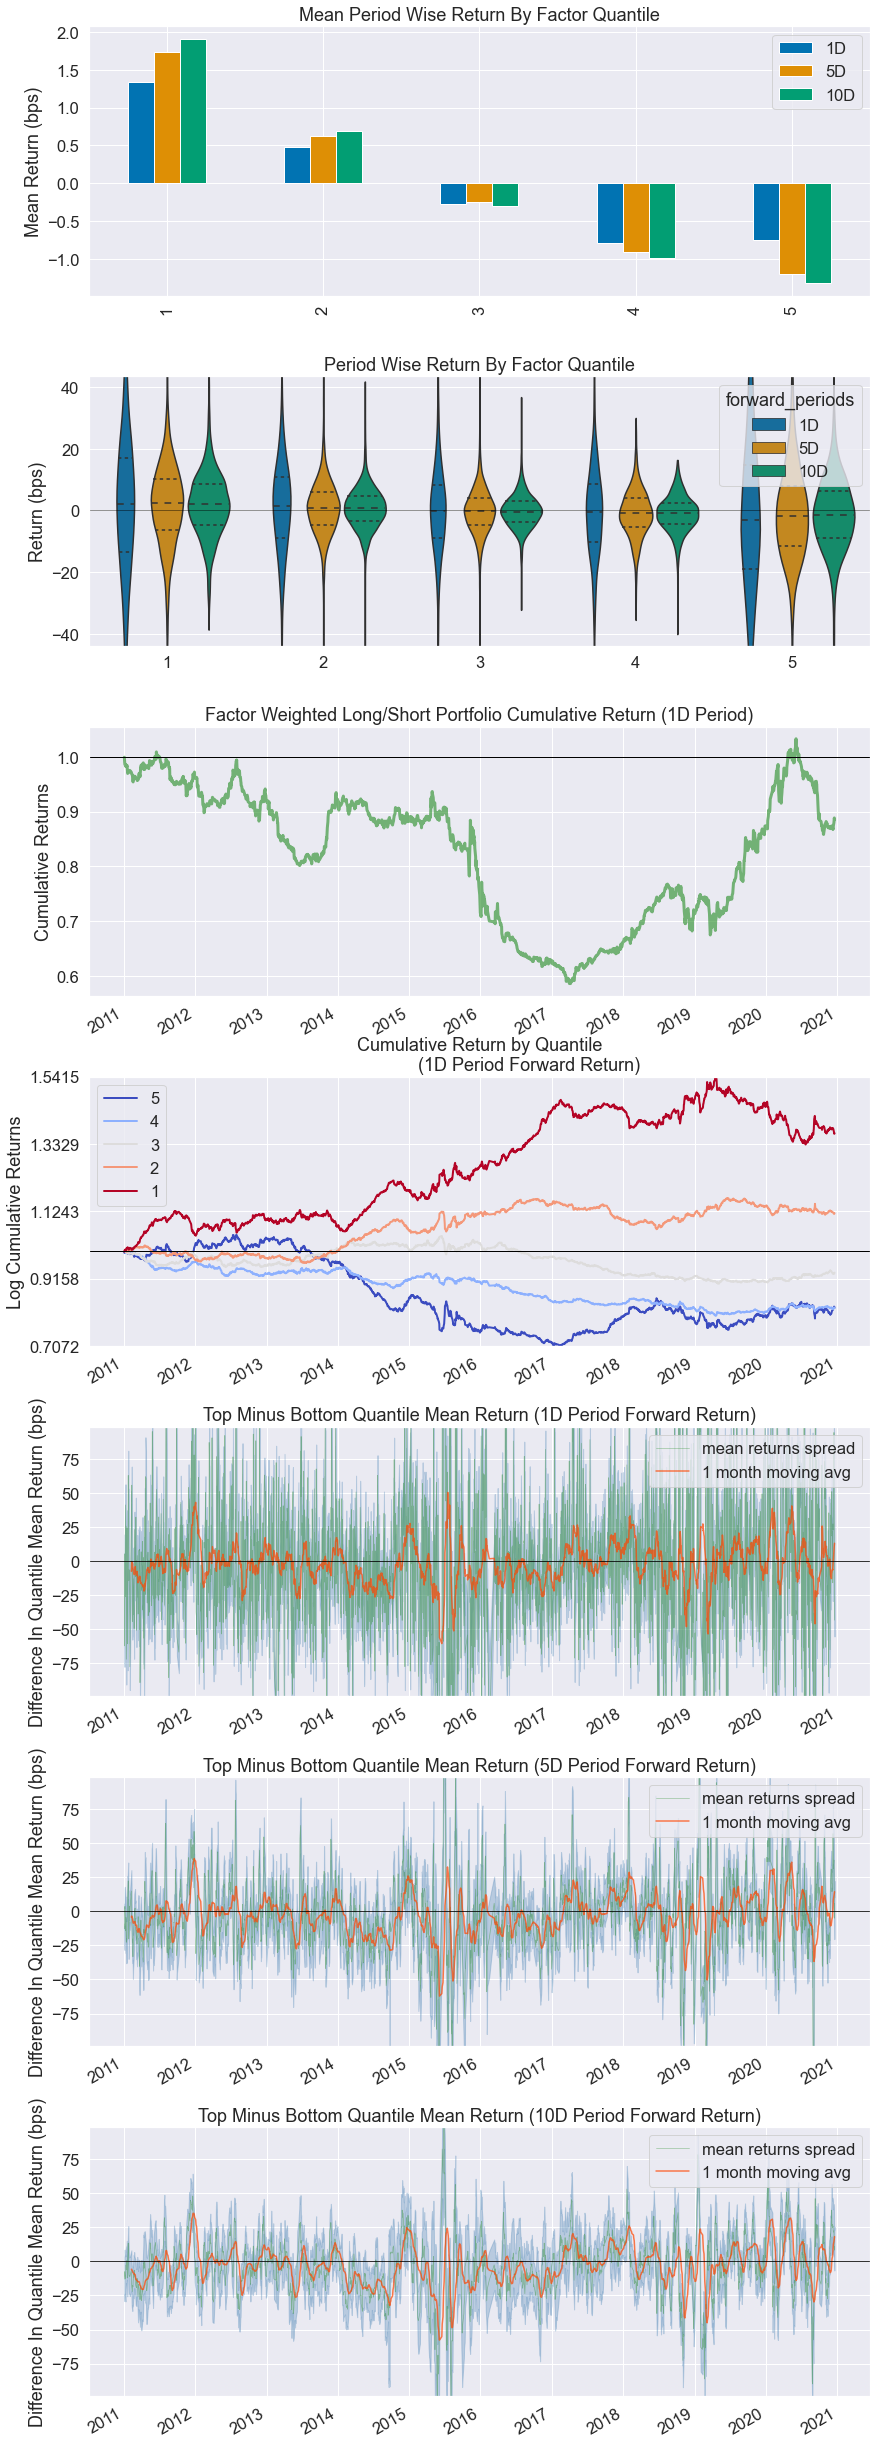

In [162]:
al.tears.create_returns_tear_sheet(factor_data=roe_factor_data)

Information Analysis


1D     5D    10D
IC Mean           0.005  0.005  0.004
IC Std.           0.077  0.091  0.097
Risk-Adjusted IC  0.062  0.059  0.037
t-stat(IC)        3.010  2.902  1.804
p-value(IC)       0.003  0.004  0.071
IC Skew           0.177  0.142  0.147
IC Kurtosis       0.772  0.287 -0.043

C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<Figure size 432x288 with 0 Axes>

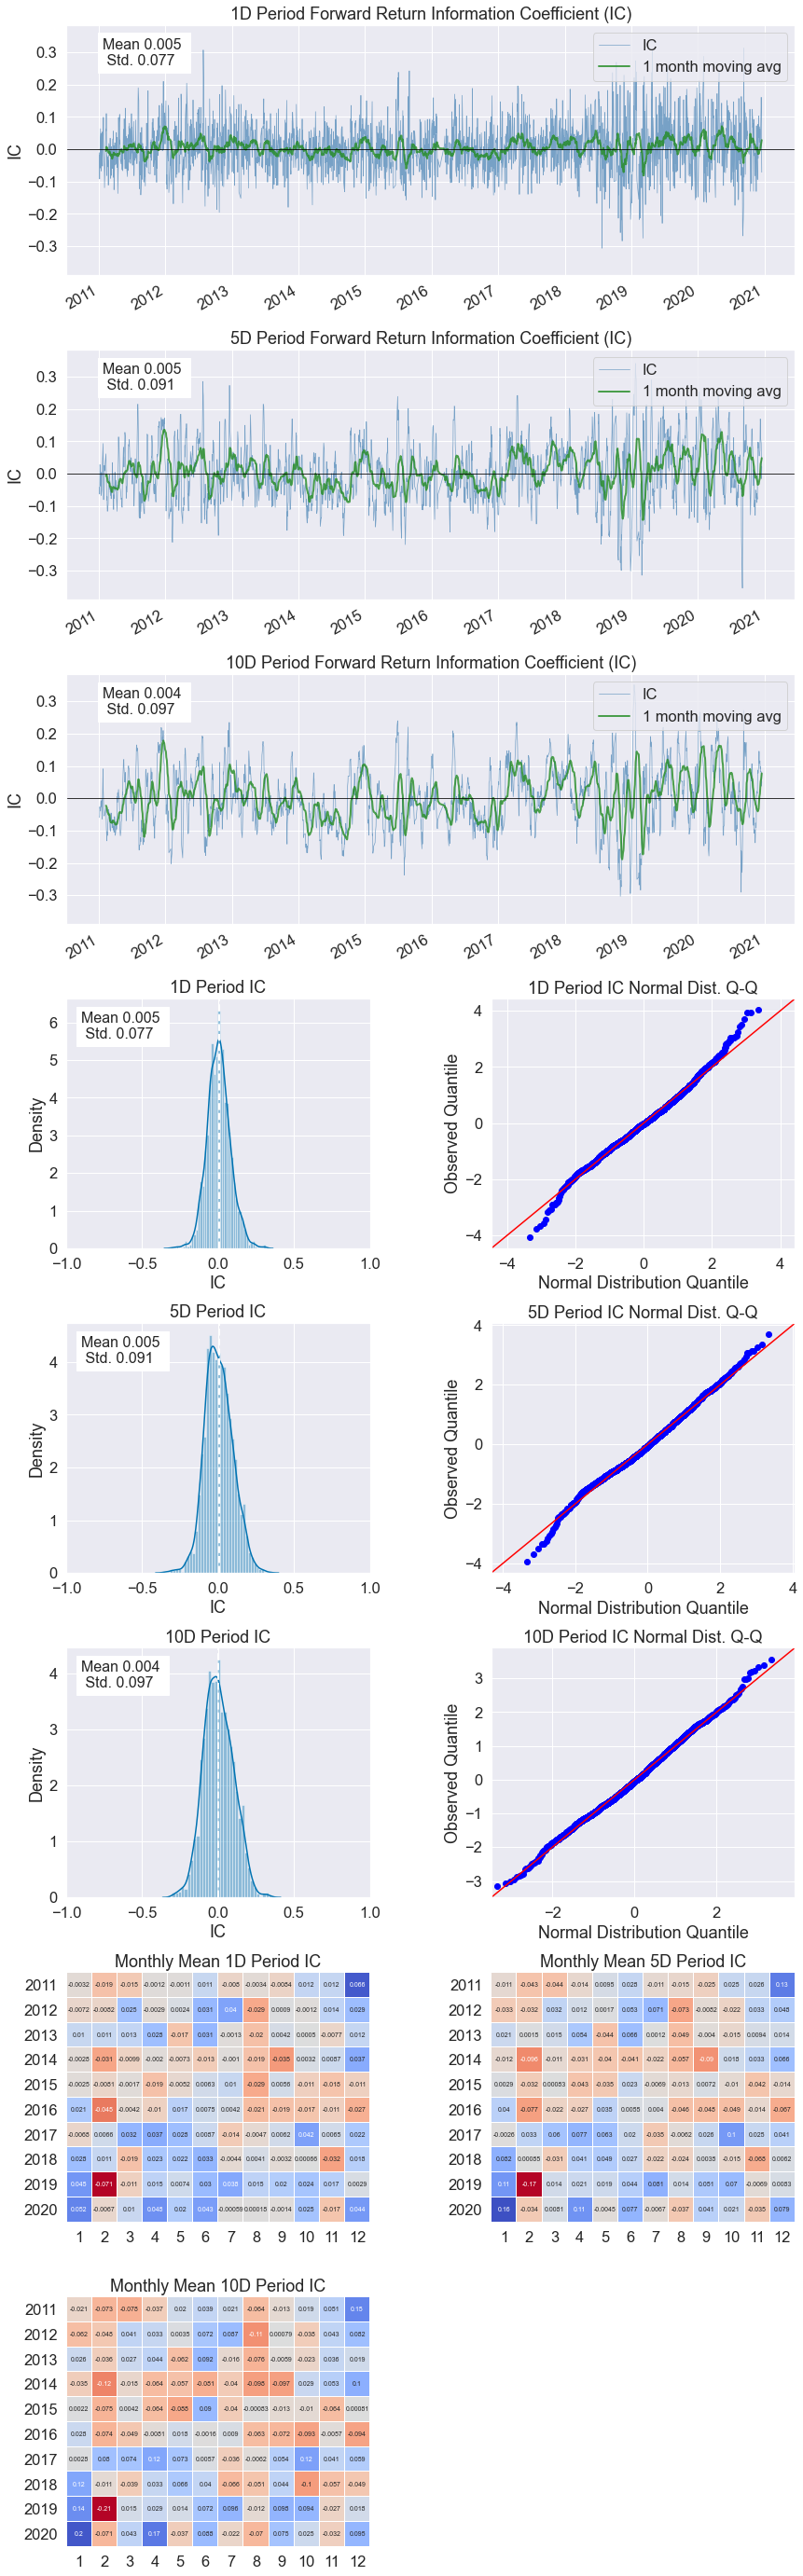

In [164]:
al.tears.create_information_tear_sheet(factor_data=roe_factor_data)

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.004  0.019  0.036
Quantile 2 Mean Turnover   0.007  0.029  0.055
Quantile 3 Mean Turnover   0.007  0.030  0.057
Quantile 4 Mean Turnover   0.006  0.027  0.050
Quantile 5 Mean Turnover   0.004  0.015  0.029

1D     5D    10D
Mean Factor Rank Autocorrelation  0.998  0.991  0.982

<Figure size 432x288 with 0 Axes>

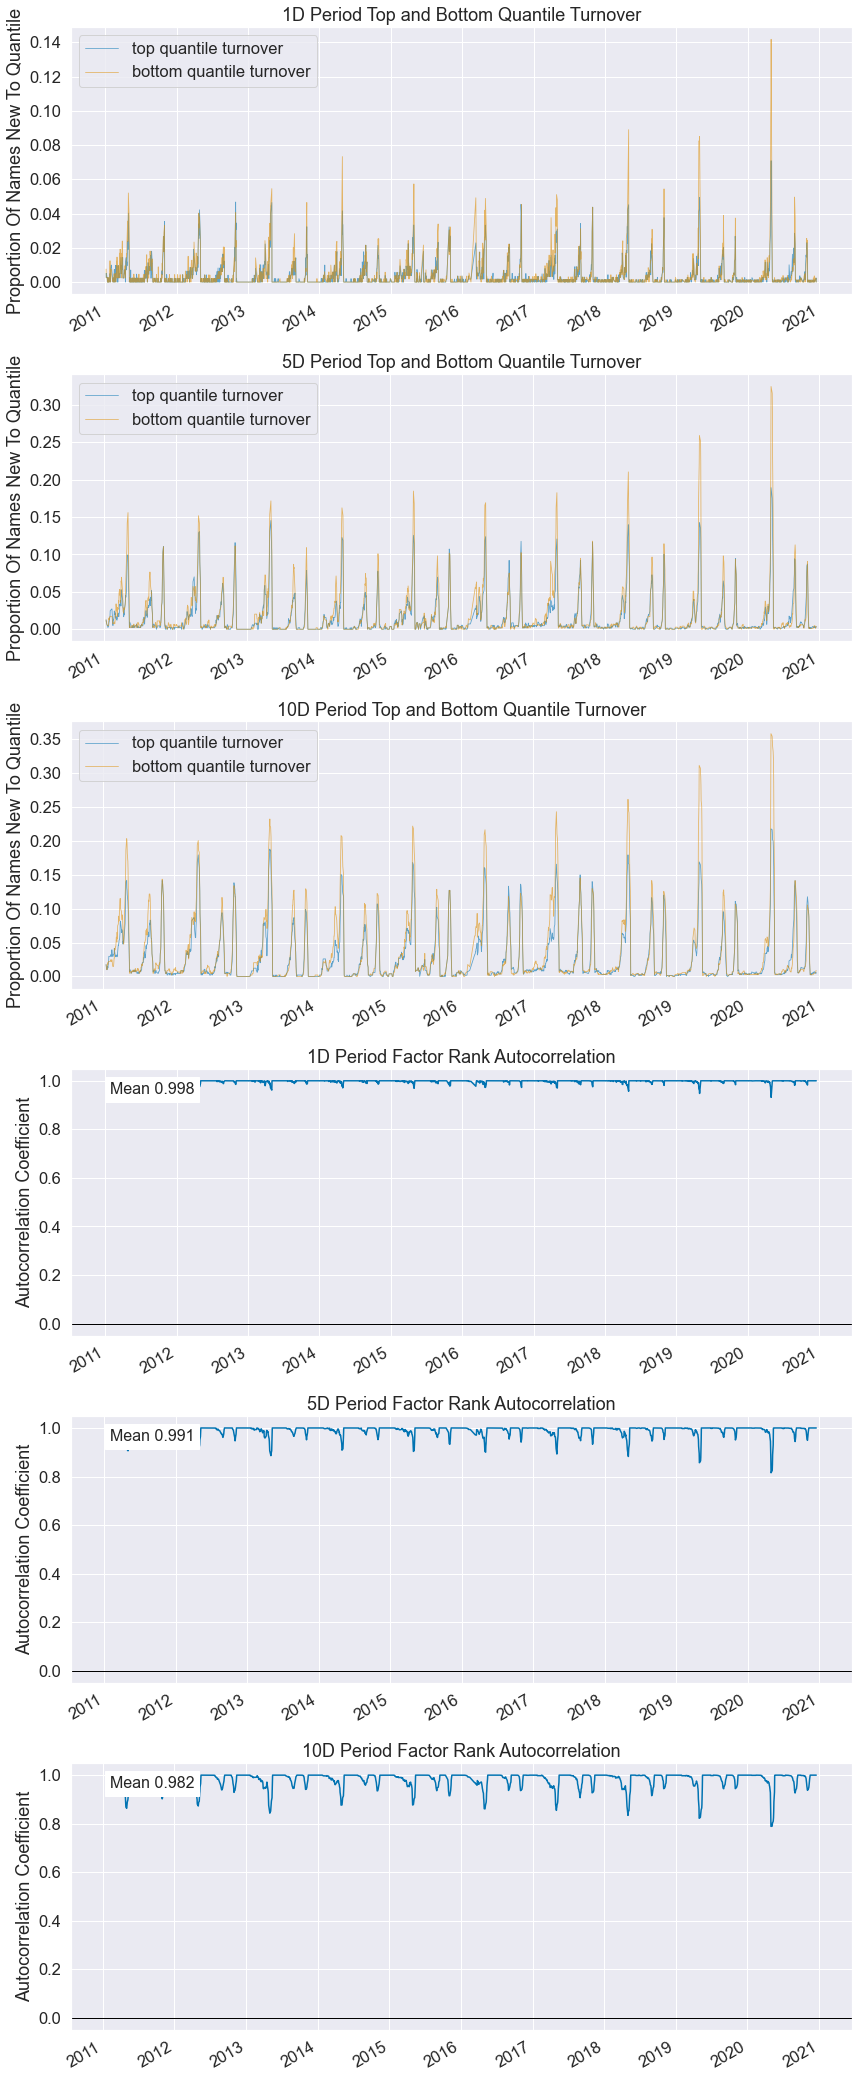

In [165]:
al.tears.create_turnover_tear_sheet(factor_data=roe_factor_data,
                                   turnover_periods=['1D','5D','10D'])

Returns Analysis


1D     5D    10D
Ann. alpha                                    -0.070 -0.063 -0.050
beta                                           0.016  0.013  0.013
Mean Period Wise Return Top Quantile (bps)    -4.014 -4.412 -4.173
Mean Period Wise Return Bottom Quantile (bps)  3.925  4.290  4.140
Mean Period Wise Spread (bps)                 -7.939 -8.688 -8.297

<Figure size 432x288 with 0 Axes>

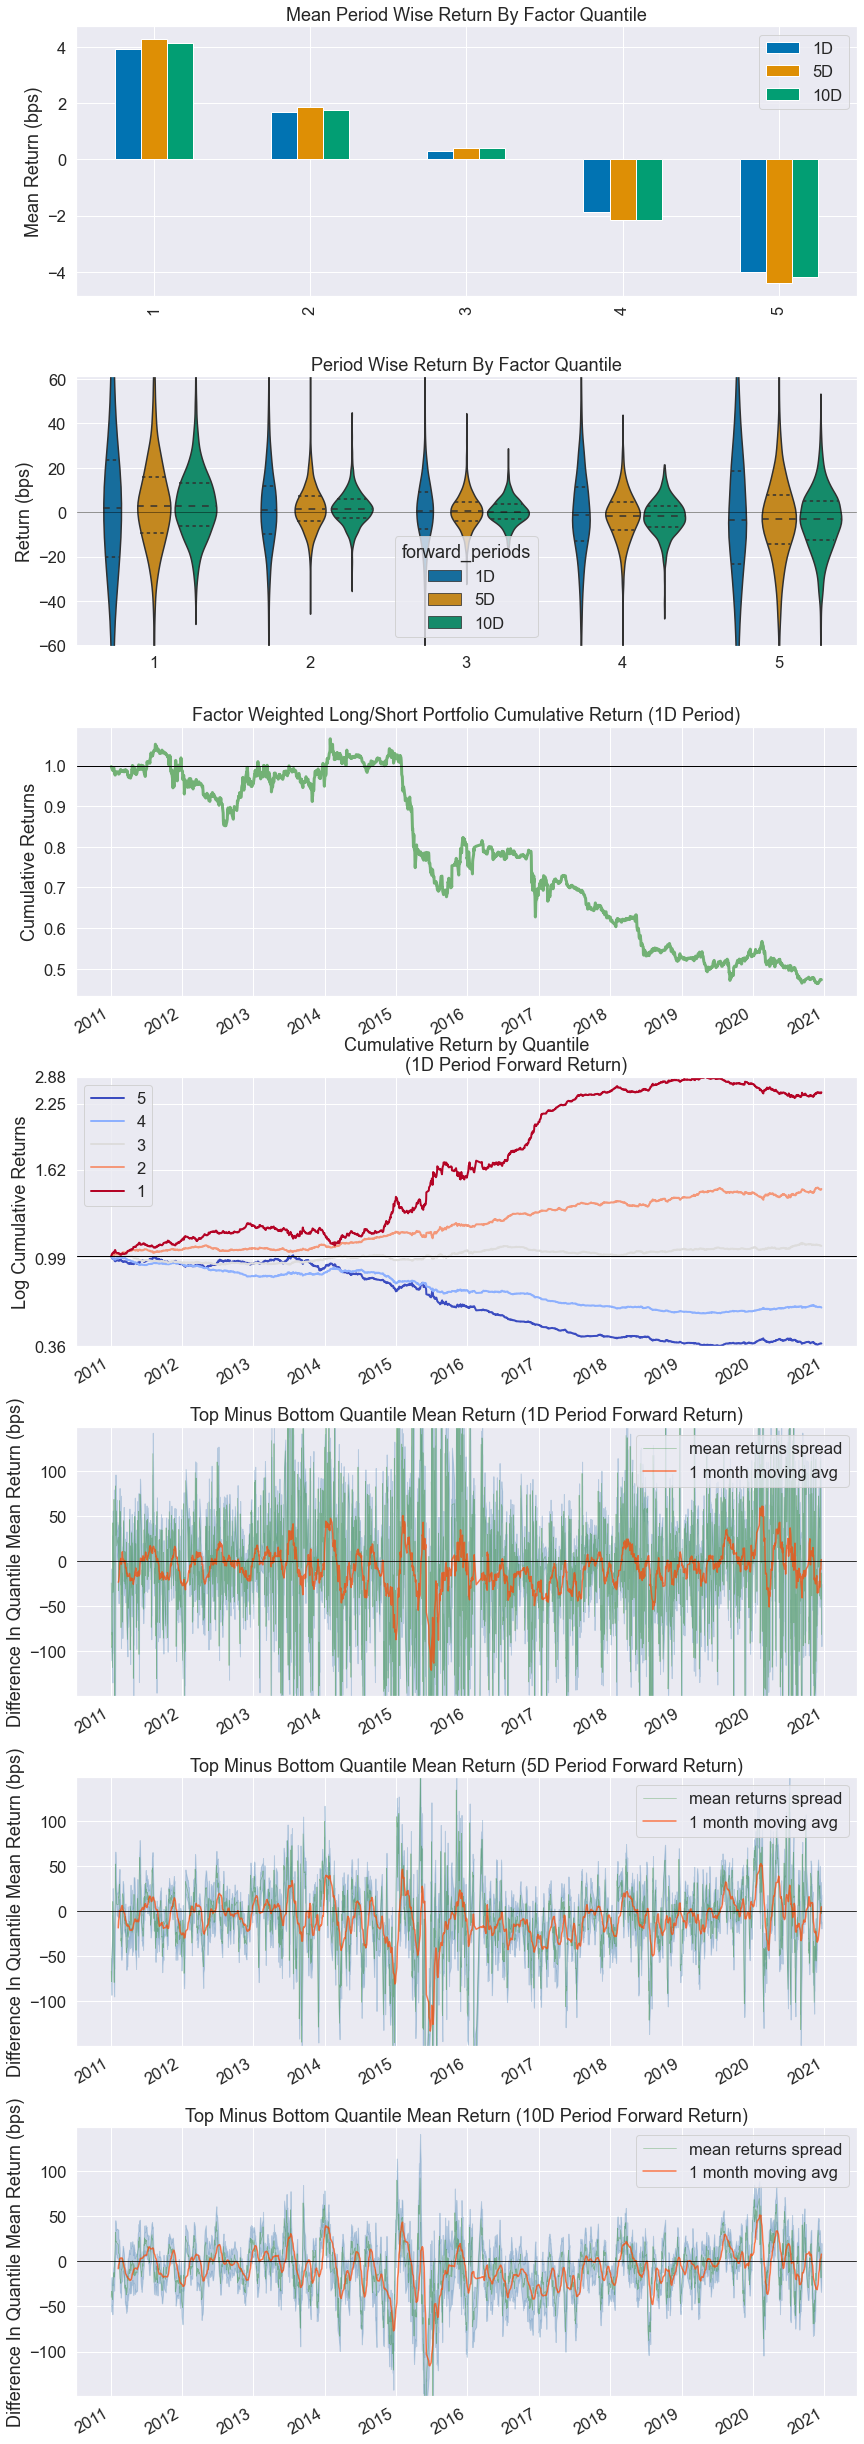

In [158]:
al.tears.create_returns_tear_sheet(factor_data=pb_factor_data)

Information Analysis


1D      5D     10D
IC Mean          -0.018  -0.026  -0.035
IC Std.           0.110   0.124   0.130
Risk-Adjusted IC -0.168  -0.209  -0.267
t-stat(IC)       -8.194 -10.203 -13.037
p-value(IC)       0.000   0.000   0.000
IC Skew          -0.190  -0.252  -0.198
IC Kurtosis       0.367   0.054  -0.283

C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiyic\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<Figure size 432x288 with 0 Axes>

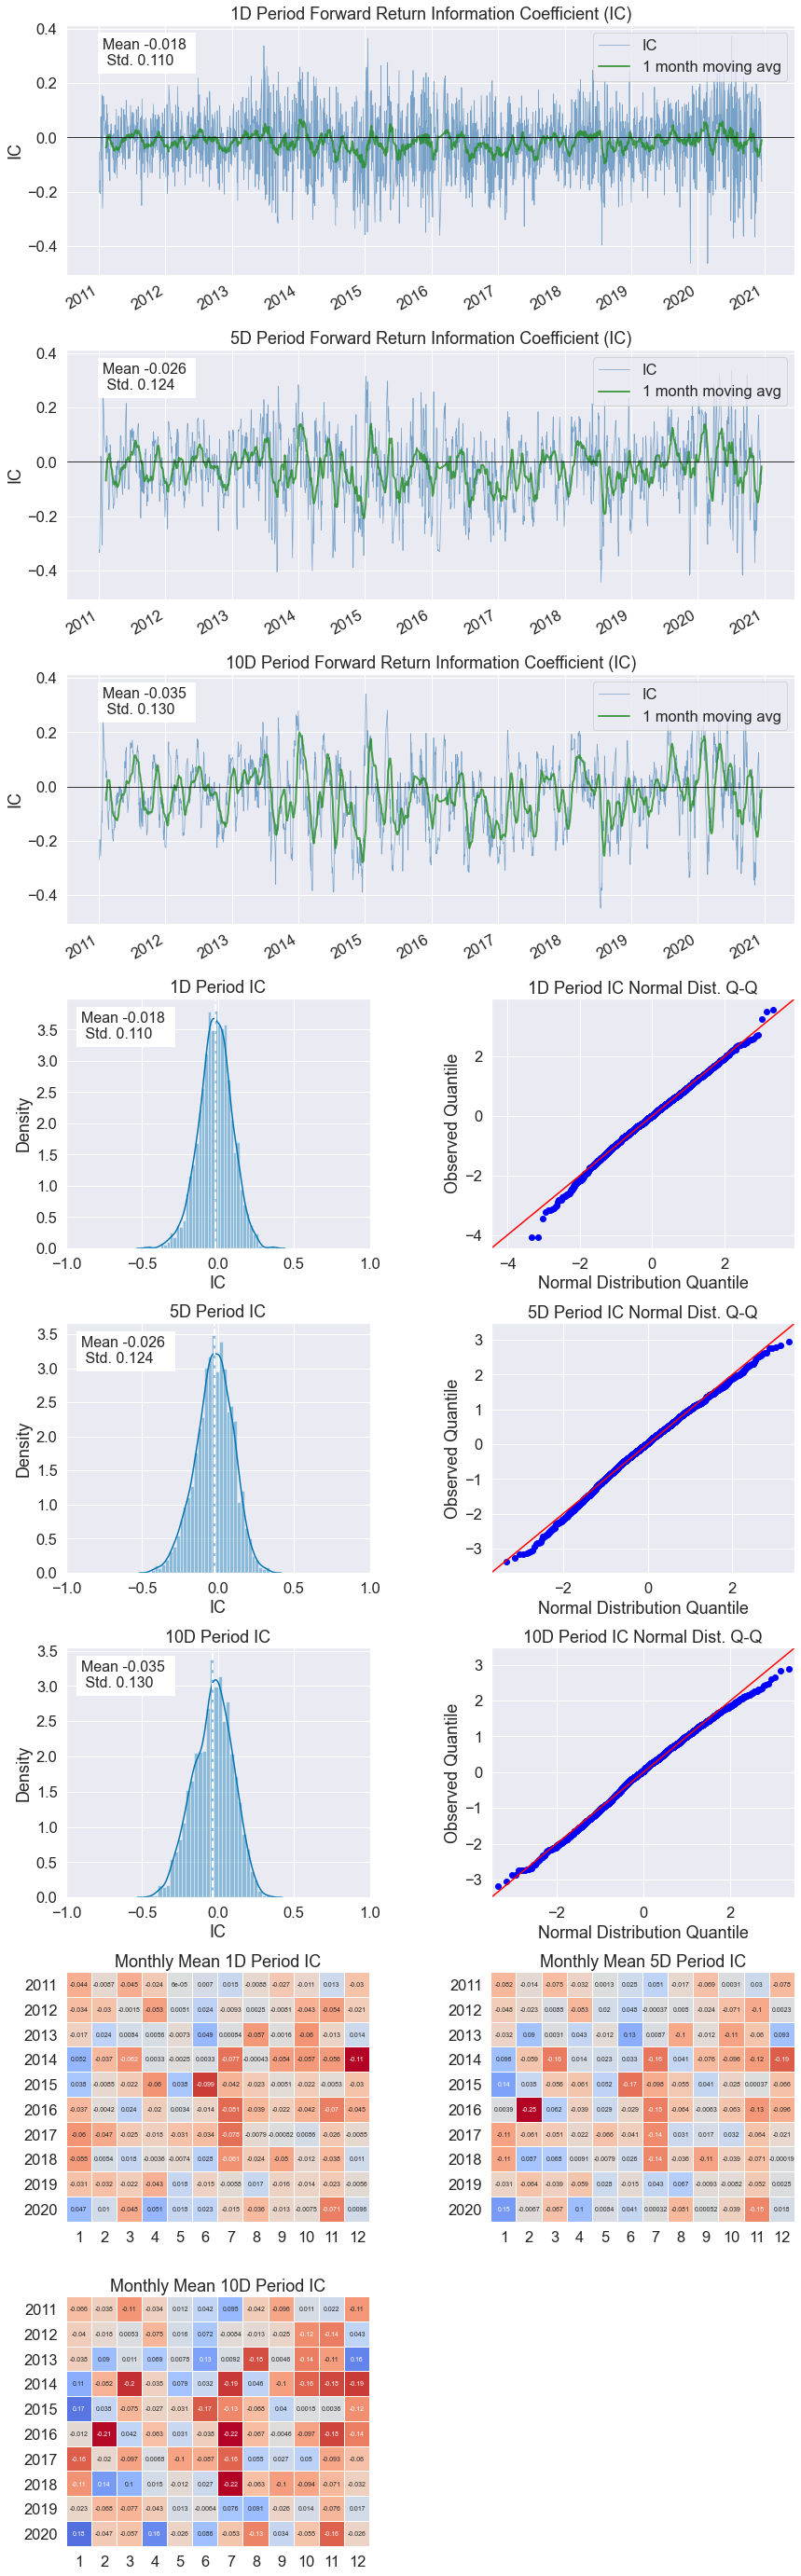

In [159]:
al.tears.create_information_tear_sheet(factor_data=pb_factor_data)

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.016  0.041  0.060
Quantile 2 Mean Turnover   0.039  0.093  0.133
Quantile 3 Mean Turnover   0.048  0.114  0.163
Quantile 4 Mean Turnover   0.043  0.102  0.147
Quantile 5 Mean Turnover   0.018  0.046  0.068

1D     5D    10D
Mean Factor Rank Autocorrelation  0.999  0.992  0.985

<Figure size 432x288 with 0 Axes>

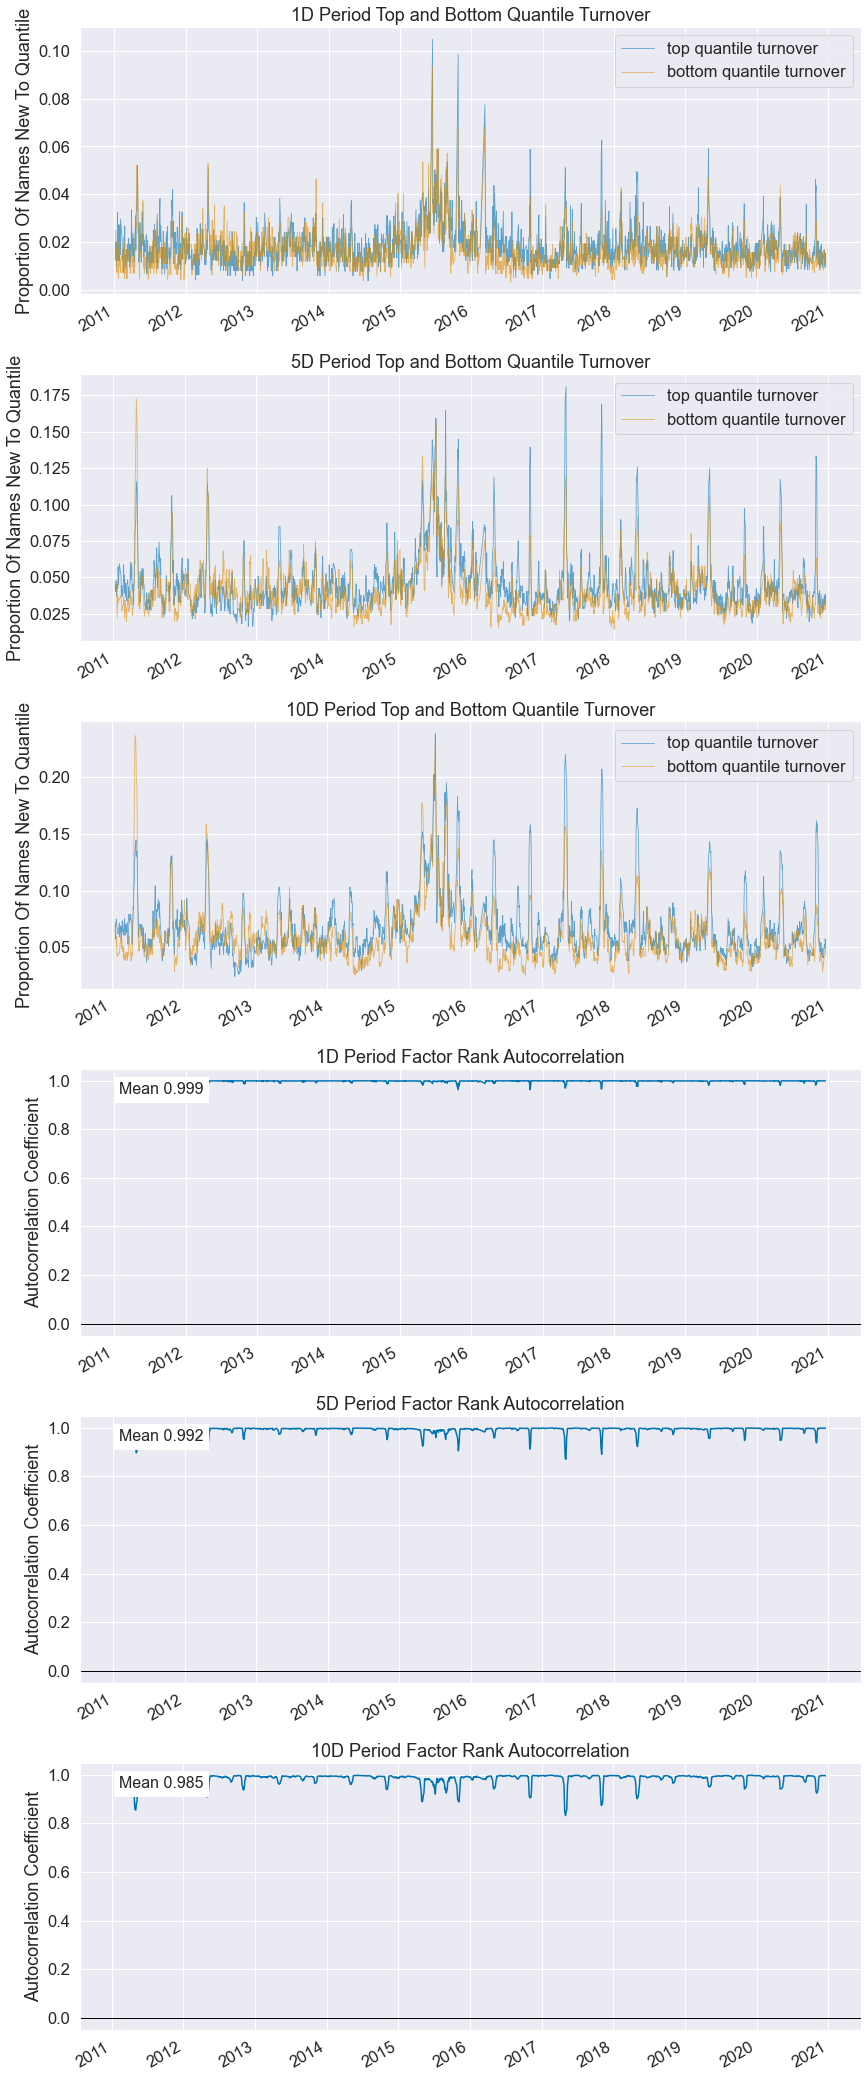

In [156]:
al.tears.create_turnover_tear_sheet(factor_data=pb_factor_data,turnover_periods=['1D','5D','10D'])

## Factor Table Construction by Hankle

In [3]:
def weekday_between(start: str, end: str):
    """A helper function that returns an array of all weekdays between start and end(exclusive)
    Args:
        start: 
            starting date of desired period, formatted as 'yyyy-mm-dd'
        end: 
            end date of desired period, formatted as 'yyyy-mm-dd'
    Return:
        An array that contains all weekdays between start and end in desired format
    """
    start_obj = datetime.strptime(start, '%Y-%m-%d')
    end_obj = datetime.strptime(end, '%Y-%m-%d')
    date = []
    while start_obj < end_obj:
        # Ignore date if it is a weekend (weekday() returns 0 for Monday and 6 for Sunday)
        if start_obj.weekday() < 5:
            date.append(start_obj.strftime('%Y-%m-%d'))
        start_obj += timedelta(days=1)

    return date

def format_asset_name(asset_name: pd.Index):
    SZ = asset_name[np.where(asset_name.astype(int) < 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SZ{}'.format)
    SH = asset_name[np.where(asset_name.astype(int) >= 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SH{}'.format)


class Dataloader:
    """A class that abstracts the loading process of factor and return data
    Attributes:
        data_path: 
            relative path to the data folder, e.g. './data'
    """
    def __init__(self, data_path: str):
        """Initialize Dataloader with data_path, the relative path to the data folder"""
        self.data_path = data_path

    def load_factor(self, factor_name: str, col_name: list, start_date: str, end_date: str) -> pd.DataFrame:
        """Load specified factor data from local csv files and convert it into a multiindexed dataframe
        Args:
            factor_name: 
                name of factor that is used to structure the folders 
                in the data folder, e.g. 'Beta', 'Momentum'
            col_name: 
                a list of columns to be included in the dataframe, 
                should be a list, e.g. ['beta_1m', 'beta_12m']
            start_date: 
                starting date of desired period for factor data, formatted as 'yyyy-mm-dd'
            end_date: 
                end date of desired period for factor data, formatted as 'yyyy-mm-dd'
        Return:
            A dataframe object with multiindex (date, asset) and columns from factor data files
        """
        factor_data = pd.DataFrame()
        for tdate in weekday_between(start_date, end_date):
            try:
                curr_day = pd.read_csv(self.data_path + factor_name +f'/{tdate}.csv')[col_name]
                
                # Pad the asset code and prefixes
                asset_name = curr_day.index.astype(int)
                SZ = asset_name[np.where(asset_name < 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SZ{}'.format)
                SH = asset_name[np.where(asset_name >= 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SH{}'.format)

                curr_day['date'] = tdate
                curr_day['asset'] = SZ.union(SH).values

                factor_data = factor_data.append(curr_day)
            except:
                # raise Exception(f"IOError for file {str(tdate)}")
                continue

        return factor_data.set_index(['date', 'asset'])

    def load_return(self, ret_filename: str) -> pd.DataFrame:
        """ Load return data from specified file and convert it to a multiindexed serie
        Args: 
            ret_filename: name of the return file used in data folder, e.g. 'daily ret.csv'
        Return:
            A pandas dataframe object with multiindex (date, asset)
        """
        daily_ret = pd.read_csv(self.data_path + ret_filename)
        asset_name = daily_ret.columns[1:].astype(int)

        # Pad the asset code and add corresponding prefixes 
        SZ = asset_name[np.where(asset_name < 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SZ{}'.format)
        SH = asset_name[np.where(asset_name >= 100000)].astype(str).str.pad(6, side='left', fillchar='0').map('SH{}'.format)
        
        # Combine all indexes
        daily_ret.columns = pd.Index(['Trddt']).union(SZ, sort=False).union(SH, sort=False)
        
        # Transform the table into desired shape
        daily_ret = daily_ret.set_index('Trddt').stack()
        daily_ret = daily_ret.rename_axis(['date', 'asset'])

        return daily_ret.to_frame("1D")

    def return_transformer():
        pass

    def load_industry(self, industry_filename: str) -> pd.DataFrame:
        ind_frame = pd.read_csv(self.data_path + industry_filename)